Notebook for the ML models on the given preprocessed data. 

The data is loaded, inspected, balanced and then used to train and evaluate some models. The models used are Decision Tree, Random Forest, SVM, Logistic Regression and Perceptron. The models are evaluated using accuracy and F1 score. The best model is then used to predict the test set. The results are then compared to the results from the NN models.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron, LogisticRegression

import matplotlib.pyplot as plt
import numpy as np

----- Load and inspect the data -----

In [2]:
import pandas as pd

df = pd.read_excel('data/Preprocessed_AFData.xlsx')

In [ ]:
df.head()

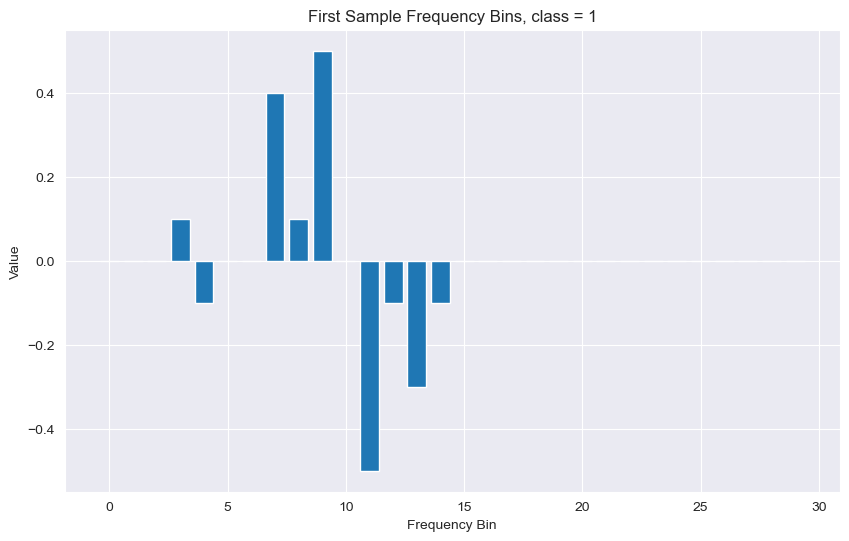

In [4]:
s_n = 0
sample = df.iloc[s_n, :-1]
sample_gt = df.iloc[s_n, -1]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(sample)), sample)
plt.xlabel('Frequency Bin')
plt.ylabel('Value')
plt.title(f'First Sample Frequency Bins, class = {sample_gt}')
plt.show()

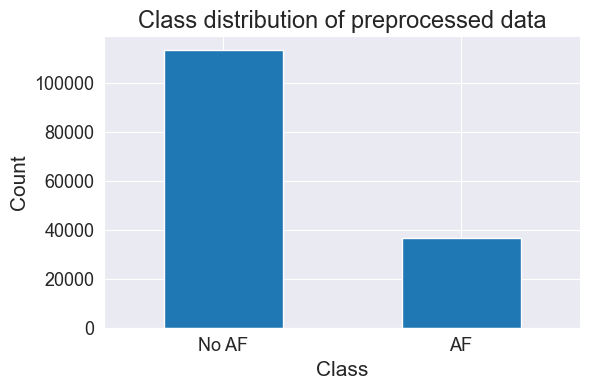

In [5]:
class_column = df['Control']

#plot the class distribution
plt.figure(figsize=(6, 4))
class_column.value_counts().plot(kind='bar')
plt.xlabel('Class', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Class distribution of preprocessed data', fontsize=17)
#rename the x-axis labels to 0 = No AF and 1 = AF
plt.xticks(ticks=[0, 1], labels=['No AF', 'AF'], rotation=0, fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.savefig('images/preprocessed_class_distribution.png')
plt.show()

----- Balance the dataset -----

In [6]:
# Count the number of samples in each class and store them in n_class_0 and n_class_1
n_class_0 = df['Control'].value_counts()[0]
n_class_1 = df['Control'].value_counts()[1]

# Print the number of samples in each class
print(f'Class 0 count: {n_class_0}') # = 113463
print(f'Class 1 count: {n_class_1}') # = 36537

# Balance the dataset by reducing the majority class size to be equal to the minority class size
df_balanced = pd.concat([df[df['Control'] == 0].sample(n=n_class_1, random_state=42), df[df['Control'] == 1]])

# Verify that the dataset is balanced
df_balanced['Control'].value_counts()

Class 0 count: 113463
Class 1 count: 36537


Control
0    36537
1    36537
Name: count, dtype: int64

In [7]:
X = df_balanced.iloc[:, :-1].values
y = df_balanced.iloc[:, -1].values

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

(73074, 30) (73074,)


----- Train and evaluate some models -----

In [9]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train) # TODO: adjust hyperparameters
y_pred = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)

print(f"Accuracy: {acc_dt}, F1: {f1_dt}")



Accuracy: 0.932192952446117, F1: 0.930196520391632


In [4]:
rf = RandomForestClassifier(random_state=1, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200)
rf.fit(X_train, y_train) # TODO: adjust hyperparameters
y_pred = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

print(f"Accuracy: {acc_rf}, F1: {f1_rf}")

#figure out the most important features
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")

#print parameters of the random forest
print(rf.get_params())

# print confusion matrix
print(confusion_matrix(y_test, y_pred))


NameError: name 'X_train' is not defined

In [ ]:
a## Randomforest grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [2, 3]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
y_pred = grid_search.best_estimator_.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
print(f"Accuracy: {acc_rf}, F1: {f1_rf}")

# most important features
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]


NameError: name 'grid_search' is not defined

In [43]:
svm = SVC(random_state=42, kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)

print(f"Accuracy: {acc_svm}, F1: {f1_svm}")


Accuracy: 0.9532671912418748, F1: 0.9525199860966286


In [42]:
lr = LogisticRegression(random_state=42, max_iter=10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)

print(f"Accuracy: {acc_lr}, F1: {f1_lr}")


ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [41]:
perceptron = Perceptron(random_state=1, penalty='l1')
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

acc_perceptron = accuracy_score(y_test, y_pred)
f1_perceptron = f1_score(y_test, y_pred)

print(f"Accuracy: {acc_perceptron}, F1: {f1_perceptron}")


Accuracy: 0.9273349298665754, F1: 0.9247448979591836


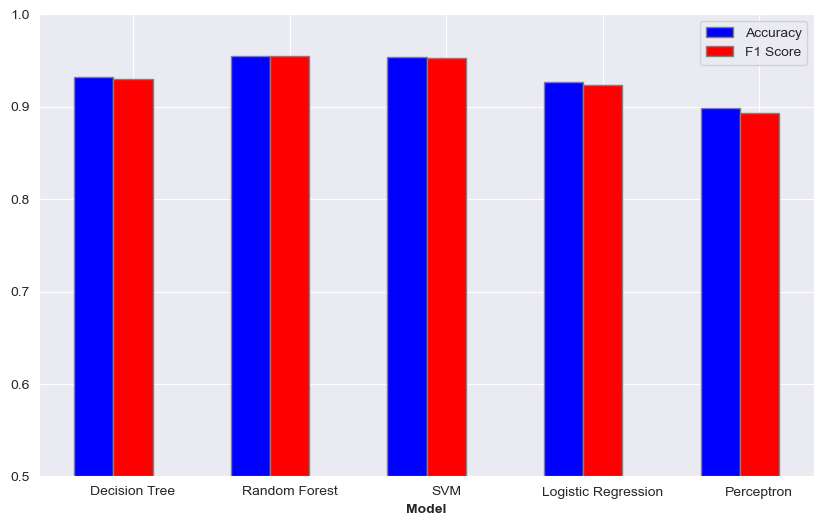

In [15]:
# Make a bar plot of the accuracies and f1 scores in the same plot
plt.figure(figsize=(10, 6))
barWidth = 0.25

bars1 = [acc_dt, acc_rf, acc_svm, acc_lr, acc_perceptron]
bars2 = [f1_dt, f1_rf, f1_svm, f1_lr, f1_perceptron]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='grey', label='Accuracy')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='grey', label='F1 Score')

plt.xlabel('Model', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Decision Tree', 'Random Forest', 'SVM', 'Logistic Regression', 'Perceptron'])
plt.legend()
plt.ylim(0.5, 1)
plt.show()

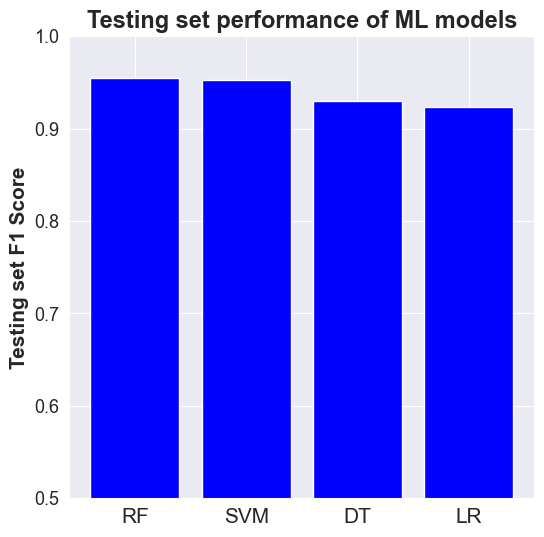

In [54]:
# Make the same bar plot, but with just F1 scores

scores = {'DT': f1_dt, 'RF': f1_rf, 'SVM': f1_svm, 'LR': f1_lr}#, 'P': f1_perceptron}
sorted_scores = dict(sorted(scores.items(), key=lambda item: item[1], reverse=True))
models = list(sorted_scores.keys())
f1_scores = list(sorted_scores.values())

plt.figure(figsize=(6, 6))
plt.bar(models, f1_scores, color='b')
plt.ylabel('Testing set F1 Score', fontweight='bold', fontsize=15)
plt.title('Testing set performance of ML models', fontweight='bold', fontsize=17)
plt.ylim(0.5, 1)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=13)
#plt.tight_layout()
plt.savefig('images/ML_f1_scores.png')
plt.show()



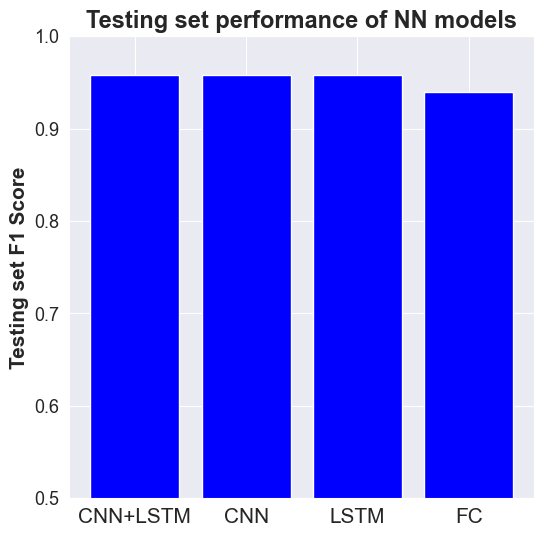

In [55]:
# Testing set F1-scores and testing set accuracy from the NN models .ipynb
CNN_LSTM_f1 = 0.958 #slowest time per epoch, converges not too fast because of dropout
CNN_LSTM_acc = 0.958
FC_f1 = 0.940 #need many epochs to converge, but is quick per epoch
FC_acc = 0.940
CNN_f1 = 0.958 # fast convergence, fast to train
CNN_acc = 0.958
LSTM_f1 = 0.958 # slow per epoch, fast to converge
LSTM_acc = 0.958

scores_nn = {'CNN+LSTM': CNN_LSTM_f1, 'FC': FC_f1, 'CNN': CNN_f1, 'LSTM': LSTM_f1}
sorted_scores_nn = dict(sorted(scores_nn.items(), key=lambda item: item[1], reverse=True))
models_nn = list(sorted_scores_nn.keys())
f1_scores_nn = list(sorted_scores_nn.values())

plt.figure(figsize=(6, 6))
plt.bar(models_nn, f1_scores_nn, color='b')
plt.ylabel('Testing set F1 Score', fontweight='bold', fontsize=15)
plt.title('Testing set performance of NN models', fontweight='bold', fontsize=17)
plt.ylim(0.5, 1)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=13)
#plt.tight_layout()
plt.savefig('images/NN_f1_scores.png')
plt.show()


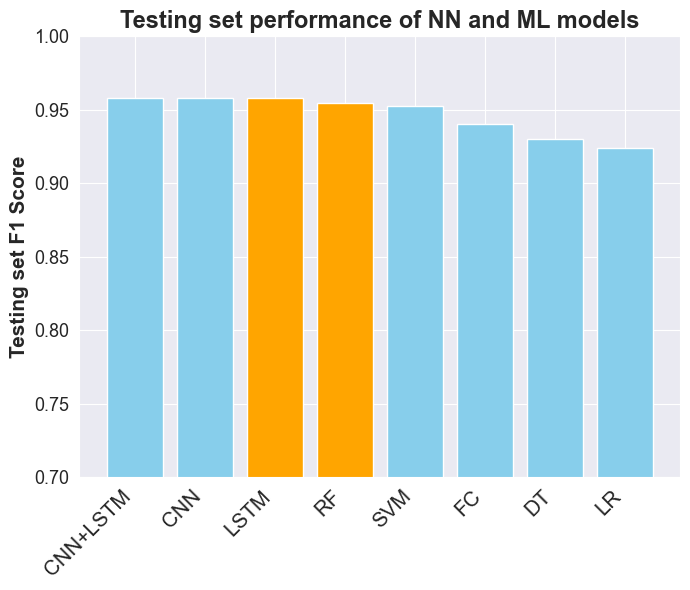

In [61]:
combined_scores = {**scores_nn, **scores}
sorted_combined_scores = dict(sorted(combined_scores.items(), key=lambda item: item[1], reverse=True))
models_combined = list(sorted_combined_scores.keys())
f1_scores_combined = list(sorted_combined_scores.values())

# Define colors for each model, with 'RF' and 'LSTM' highlighted
colors = ['orange' if model in ['RF', 'LSTM'] else 'skyblue' for model in models_combined]

# Create the combined bar plot
plt.figure(figsize=(7, 6))
plt.bar(models_combined, f1_scores_combined, color=colors)
plt.ylabel('Testing set F1 Score', fontweight='bold', fontsize=15)
plt.title('Testing set performance of NN and ML models', fontweight='bold', fontsize=17)
plt.ylim(0.7, 1)
plt.xticks(models_combined, rotation=45, fontsize=15, ha='right')  # Adjusted for better label display
plt.yticks(fontsize=13)
plt.tight_layout()
plt.savefig('images/combined_f1_scores.png')
plt.show()

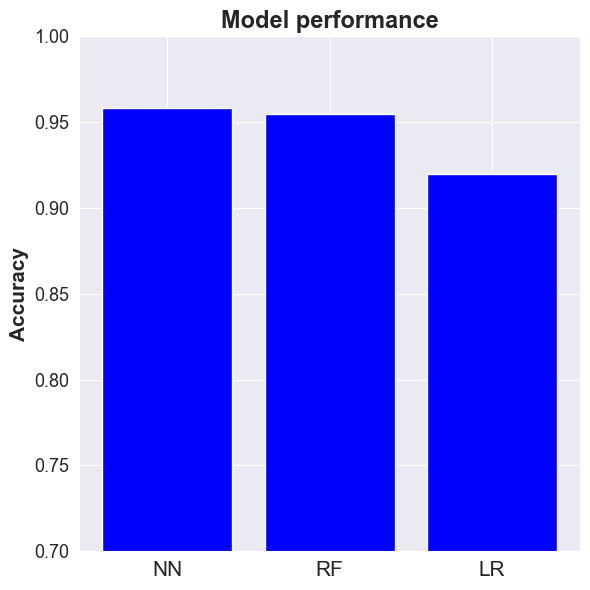

In [7]:
# acc_CNN_LSTM = 0.958
# acc_dt = 0.93219
# acc_rf = 0.955
# acc_svm = 0.95327
# acc_p = 0.927335

acc_NN = 0.958
acc_rf = 0.955
acc_lr = 0.92

scores_pp = {'NN': acc_NN, 'RF': acc_rf, 'LR': acc_lr}
sorted_scores_pp = dict(sorted(scores_pp.items(), key=lambda item: item[1], reverse=True))
models_pp = list(sorted_scores_pp.keys())
acc_scores_pp = list(sorted_scores_pp.values())

plt.figure(figsize=(6, 6))
plt.bar(models_pp, acc_scores_pp, color='b')
plt.ylabel('Accuracy', fontweight='bold', fontsize=15)
plt.title('Model performance', fontweight='bold', fontsize=17)
plt.ylim(0.7, 1)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=13)

plt.tight_layout()
plt.savefig('images/pp_results.png')
plt.show()



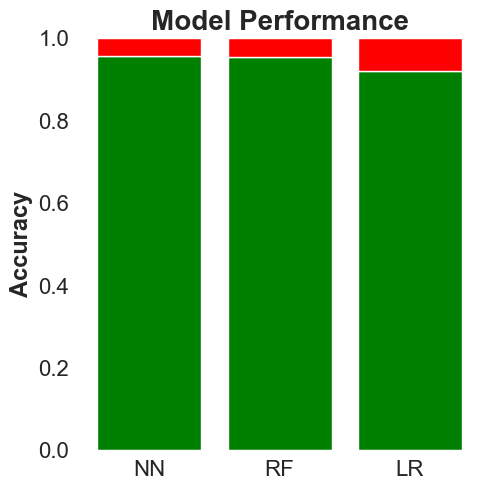

In [18]:
import matplotlib.pyplot as plt

# Accuracy scores
acc_NN = 0.958
acc_rf = 0.955
acc_lr = 0.92

# Dictionary of scores
scores_pp = {'NN': acc_NN, 'RF': acc_rf, 'LR': acc_lr}

# Sorting the dictionary by scores in descending order
sorted_scores_pp = dict(sorted(scores_pp.items(), key=lambda item: item[1], reverse=True))

# Extracting model names and their corresponding accuracy scores
models_pp = list(sorted_scores_pp.keys())
acc_scores_pp = list(sorted_scores_pp.values())

# Set up the figure and axis
plt.figure(figsize=(5, 5))

# Create two sets of bars for each model
for i, (model, score) in enumerate(sorted_scores_pp.items()):
    # Green bar for the actual accuracy
    plt.bar(model, score, color='green')
    # Red bar for the gap from actual accuracy to 1.0
    plt.bar(model, 1 - score, bottom=score, color='red')

# Adding labels and title
plt.ylabel('Accuracy', fontweight='bold', fontsize=17)
plt.title('Model Performance', fontweight='bold', fontsize=20)
plt.ylim(0, 1)  # Set the limits for y-axis
plt.xticks(rotation=0, fontsize=16)  # Model names on x-axis
plt.yticks(fontsize=16)
plt.grid(False)

# #add the number for each bar, below the top
# for i, v in enumerate(acc_scores_pp):
#     plt.text(i, v + 0.01, str(round(v, 2)), color='black', ha='center', fontsize=15)


#remove background
plt.gca().patch.set_facecolor('white')

# Adjust layout and save the figure if needed
plt.tight_layout()
plt.savefig('images/pp_results.png')  # Save the plot as a PNG file
plt.show()  # Display the plot
